In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data


In [2]:
dataset_path = "/content/drive/MyDrive/deepfake-detection/datasets/small_dataset_random"

# Image Analysis


In [3]:
import os
from collections import Counter

classes = sorted(os.listdir(dataset_path))
print(f"Found {len(classes)} classes: {classes}")

Found 6 classes: ['real', 'stable_diffusion_xl', 'stylegan1', 'stylegan2', 'stylegan3', 'thispersondoesnotexist']


In [4]:
image_paths = []
labels = []

for cls in classes:
  cls_dir = os.path.join(dataset_path, cls)
  for img_path in os.listdir(cls_dir):
    image_paths.append(os.path.join(cls_dir, img_path))
    labels.append(cls)

print(f"Found {len(image_paths)} total images")
print("Sample images per class: ", Counter(labels))

Found 1000 total images
Sample images per class:  Counter({'real': 500, 'stable_diffusion_xl': 100, 'stylegan1': 100, 'stylegan2': 100, 'stylegan3': 100, 'thispersondoesnotexist': 100})


In [9]:
from PIL import Image
import numpy as np

dims = []
for img_path in image_paths:
    with Image.open(img_path) as img:
        dims.append(img.size)

dims = np.array(dims)
widths, heights = dims[:, 0], dims[:, 1]
print(f"Mean WxH: {widths.mean():.1f} x {heights.mean():.1f}")
print(f"Min WxH: {widths.min()} x {heights.min()}")
print(f"Max WxH: {widths.max()} x {heights.max()}")


Mean WxH: 601.0 x 621.0
Min WxH: 178 x 218
Max WxH: 1024 x 1024


In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import random

n_classes = len(classes)
n_images = 5

fig, axes = plt.subplots(n_classes, n_images, figsize=(n_images*3.5, n_classes*2.5))

for i, cls in enumerate(classes):
    cls_imgs = [p for p, l in zip(image_paths, labels) if l == cls]
    for j in range(n_images):
        ax = axes[i, j] if n_classes > 1 else axes[j]
        img = Image.open(random.choice(cls_imgs))
        ax.imshow(img)
        ax.axis('off')
        if j == 2:
            ax.set_title(cls, fontsize=14)
plt.suptitle("Random samples per class", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

<ipython-input-21-789c79744cb2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='class', y='count', palette='tab10')


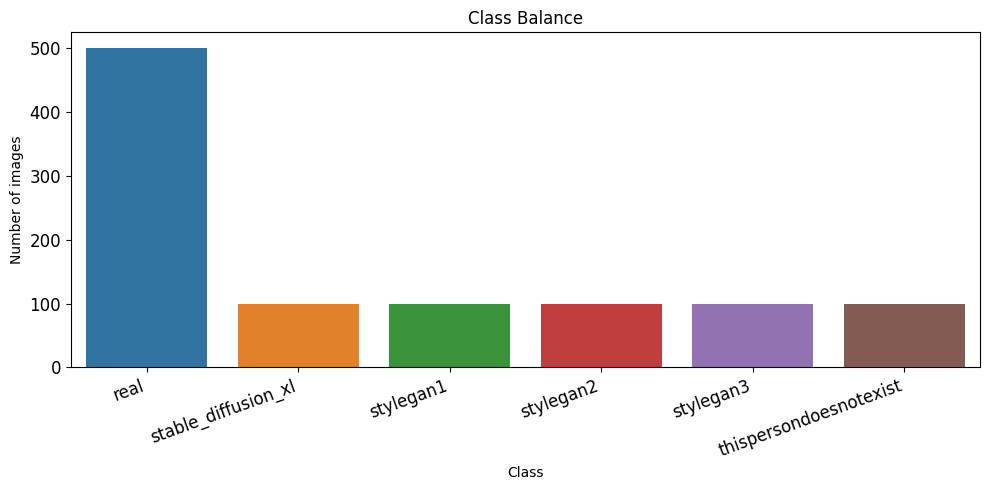

In [21]:
import seaborn as sns
import pandas as pd

count = Counter(labels)
df = pd.DataFrame({'class': list(count.keys()), 'count': list(count.values())})

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df, x='class', y='count', palette='tab10')
plt.title('Class Balance')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.xticks(rotation=20, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()